<a href="https://colab.research.google.com/github/maoramirez69/14MBID/blob/main/2_Modelo_Chagas_RBP33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# instalar versión específica de itsdangerous para evitar conflictos
!pip install -U itsdangerous
#!pip install itsdangerous#==2.1.2
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


## Importar las Librerías

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings 
import re
import io
import matplotlib.cm as cm
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from numpy import corrcoef, transpose, arange
from IPython.display import Image
import statsmodels.api as sm
from scipy import stats
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from google.colab import data_table
data_table.disable_dataframe_formatter()

## **Base a utilizar: ChEMBL**
Se utilizarán datos recuperados de la base de datos ChEMBL. Para más información ver [*Base de Datos de ChEMBL*](https://www.ebi.ac.uk/chembl/)

Se busca en objetivos o 'targets' la primera enfermedad, en este caso será chagas desde ChEMBL [*Query chagas desde ChEMBL*](https://www.ebi.ac.uk/chembl/g/#search_results/targets/query=lymphoma)


In [4]:
chagas_trg = new_client.target
chagas_trgt_query = chagas_trg.search('trypanosoma')
# Convertir a dataframe
chagas_trgs = pd.DataFrame.from_dict(chagas_trgt_query)
#Visualizar el dataframe
chagas_trgs

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Trypanosoma,Trypanosoma,16.0,True,CHEMBL612883,[],ORGANISM,5690
1,[],Trypanosoma brucei,Trypanosoma brucei,14.0,False,CHEMBL612849,[],ORGANISM,5691
2,[],Trypanosoma cruzi,Trypanosoma cruzi,14.0,False,CHEMBL368,[],ORGANISM,5693
3,[],Trypanosoma evansi,Trypanosoma evansi,14.0,False,CHEMBL1075362,[],ORGANISM,5697
4,[],Trypanosoma lewisi,Trypanosoma lewisi,14.0,False,CHEMBL2366781,[],ORGANISM,5695
...,...,...,...,...,...,...,...,...,...
69,[],Trypanosoma cruzi,Phosphodiesterase,7.0,False,CHEMBL4523319,"[{'accession': 'Q53I60', 'component_descriptio...",SINGLE PROTEIN,5693
70,[],Trypanosoma cruzi (strain CL Brener),Histidine--tRNA ligase,7.0,False,CHEMBL4662925,"[{'accession': 'Q4DA54', 'component_descriptio...",SINGLE PROTEIN,353153
71,[],Trypanosoma cruzi (strain CL Brener),"Tyrosyl-tRNA synthetase, putative",7.0,False,CHEMBL4662926,"[{'accession': 'Q4DSP6', 'component_descriptio...",SINGLE PROTEIN,353153
72,[],Trypanosoma cruzi,Proteasome subunit beta,7.0,False,CHEMBL4662930,"[{'accession': 'O96673', 'component_descriptio...",SINGLE PROTEIN,5693


In [5]:
#Calcular el tamaño del dataframe
print('Total registros: ', chagas_trgs.size, ' Dimension: ', chagas_trgs.shape)

Total registros:  666  Dimension:  (74, 9)


Se asigna la tercera entrada (que corresponde a la enfermedad objetivo) a la variable ***selected_target***, probando las 2 primeras entradas sin resultado asociados

In [6]:
chembl_trg = chagas_trgs.target_chembl_id[1]  #chagas_trgs.target_chembl_id[5]
chembl_trg

'CHEMBL612849'

Es necesario filtrar la información para que solo recupere datos con bioactividad IC50 para la primera enfermedad **target_chembl_id = 'CHEMBL612849'** que se muestran como valor de pChEMBL con valores de IC50

In [7]:
activity = new_client.activity
res_ic50 = activity.filter(target_chembl_id = chembl_trg).filter(standard_type="IC50")

Se convierte el array **res_ic50** resultado del comando anterior  en *DataFrame* de Pandas.

In [10]:
df = pd.DataFrame.from_dict(res_ic50) #20 mins

HttpApplicationError: ignored

In [9]:
#df = pd.read_csv('chagas_res_1_diana2.csv', sep = ',')
df.shape

NameError: ignored

In [ ]:
df['standard_value']
#molecule_chembl_id	canonical_smiles	standard_value

0       100000.0
1       100000.0
2       100000.0
3       100000.0
4        12200.0
          ...   
3182      5800.0
3183      4100.0
3184      5300.0
3185      3900.0
3186      2200.0
Name: standard_value, Length: 3187, dtype: object

In [ ]:
df.dtypes

activity_comment              object
activity_id                    int64
activity_properties           object
assay_chembl_id               object
assay_description             object
assay_type                    object
assay_variant_accession       object
assay_variant_mutation        object
bao_endpoint                  object
bao_format                    object
bao_label                     object
canonical_smiles              object
data_validity_comment         object
data_validity_description     object
document_chembl_id            object
document_journal              object
document_year                float64
ligand_efficiency             object
molecule_chembl_id            object
molecule_pref_name            object
parent_molecule_chembl_id     object
pchembl_value                 object
potential_duplicate            int64
qudt_units                    object
record_id                      int64
relation                      object
src_id                         int64
s

In [ ]:
#eliminar variables tipo objeto con for excepto molecule_chembl_id y canonical_smiles
for col in df.columns:
    if df[col].dtype == 'object':
        if col != 'molecule_chembl_id' and col != 'canonical_smiles' and col != 'standard_value':
            df.drop(col, axis=1, inplace=True)

## Crear mapa de calor

<ipython-input-37-5d7e73fb5297>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


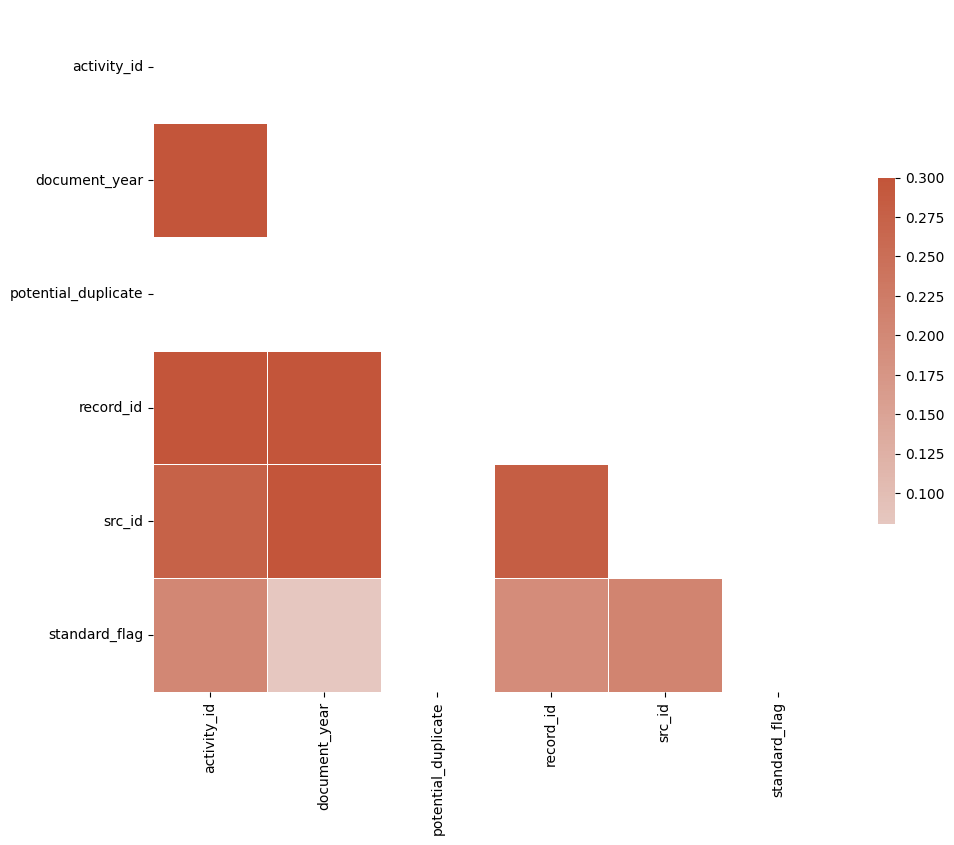

In [ ]:
# crear matriz de correlación
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#ver figura generada

## **Proceso KDD**
Se eliminan registros vacíos en la columna **standard_value** y **canonical_smiles**.

In [ ]:
# df = df[df.standard_value.notna()]
# df = df[df.canonical_smiles.notna()]
# df.shape

AttributeError: ignored

Se verifica la cantidad de registros únicos y luego se eliminan los duplicados

In [ ]:
len(df.canonical_smiles.unique())
df2_kdd = df.drop_duplicates(['canonical_smiles'])
df2_kdd

,activity_id,canonical_smiles,document_year,molecule_chembl_id,potential_duplicate,record_id,src_id,standard_flag,standard_value
0,33015,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,1997.0,CHEMBL2111280,0,308317,1,1,100000.0
4,34247,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O,1997.0,CHEMBL2111248,0,308316,1,1,12200.0
7,52726,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O,1997.0,CHEMBL2111283,0,308313,1,1,53000.0
11,55118,Nc1ncnc2c1cnn2[C@@H]1C=C[C@H](O)C1,1997.0,CHEMBL346319,0,308320,1,1,100000.0
13,56430,Nc1ncnc2c1cnn2[C@H]1C=C[C@H](O)[C@@H]1O,1997.0,CHEMBL2111249,0,308321,1,1,100000.0
...,...,...,...,...,...,...,...,...,...
3181,24381188,CC(C)C[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc23)n2...,2022.0,CHEMBL5086837,0,3777233,1,1,5900.0
3182,24381189,CC[C@H](C)[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc2...,2022.0,CHEMBL5076902,0,3777234,1,1,5800.0
3183,24381190,CC(C)C[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc23)n2...,2022.0,CHEMBL5093406,0,3777235,1,1,4100.0
3184,24381191,CC[C@H](C)[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc2...,2022.0,CHEMBL5078872,0,3777236,1,1,5300.0


## Eliminar variables que no aportan al modelo

In [ ]:
# dejar solo las variables molecule_chembl_id canonical_smiles y standard_value
df2_kdd = df2_kdd[['molecule_chembl_id', 'canonical_smiles', 'standard_value']]
df2_kdd

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2111280,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0
4,CHEMBL2111248,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O,12200.0
7,CHEMBL2111283,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O,53000.0
11,CHEMBL346319,Nc1ncnc2c1cnn2[C@@H]1C=C[C@H](O)C1,100000.0
13,CHEMBL2111249,Nc1ncnc2c1cnn2[C@H]1C=C[C@H](O)[C@@H]1O,100000.0
...,...,...,...
3181,CHEMBL5086837,CC(C)C[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc23)n2...,5900.0
3182,CHEMBL5076902,CC[C@H](C)[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc2...,5800.0
3183,CHEMBL5093406,CC(C)C[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc23)n2...,4100.0
3184,CHEMBL5078872,CC[C@H](C)[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc2...,5300.0


In [ ]:
#imputar valores faltantes en standard_value con valor minimo
df2_kdd['standard_value'] = df2_kdd['standard_value'].fillna(df2_kdd['standard_value'].astype(float).min())
df2_kdd

<ipython-input-41-2d69ca448fe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_kdd['standard_value'] = df2_kdd['standard_value'].fillna(df2_kdd['standard_value'].astype(float).min())


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2111280,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0
4,CHEMBL2111248,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O,12200.0
7,CHEMBL2111283,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O,53000.0
11,CHEMBL346319,Nc1ncnc2c1cnn2[C@@H]1C=C[C@H](O)C1,100000.0
13,CHEMBL2111249,Nc1ncnc2c1cnn2[C@H]1C=C[C@H](O)[C@@H]1O,100000.0
...,...,...,...
3181,CHEMBL5086837,CC(C)C[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc23)n2...,5900.0
3182,CHEMBL5076902,CC[C@H](C)[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc2...,5800.0
3183,CHEMBL5093406,CC(C)C[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc23)n2...,4100.0
3184,CHEMBL5078872,CC[C@H](C)[C@@H]1NC(=O)[C@@H](Cc2c[nH]c3ccccc2...,5300.0


In [ ]:
# crear expresión regular para validar smiles
pattern = re.compile('^(?:\[.*?\]|[A-Za-z0-9@%+\-=\(\)\[\]\{\}\.\#\$\*\^\~\?\!\/\\\:]+)$')
# crear función para validar smiles
def valid_smiles(smiles):
    if pattern.match(smiles):
        return True
    else:
        return False
    
# crear nueva columna con resultado de validación
df2_kdd['is_valid'] = df2_kdd['canonical_smiles'].apply(valid_smiles)

TypeError: ignored

In [ ]:
df2_kdd.head(3)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2111280,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0
4,CHEMBL2111248,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O,12200.0
7,CHEMBL2111283,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O,53000.0


In [ ]:
#eliminar registros con smiles no validos
df2_kdd = df2_kdd[df2_kdd.is_valid == True]
df2_kdd

AttributeError: ignored

Ejemplo de verificación de diagrama de la segunda molécula

In [ ]:
!pip install rdkit
from rdkit import Chem
molecula_0 = Chem.MolFromSmiles(df2_kdd['canonical_smiles'][0])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 29.3 MB/s eta 0:00:00


C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O


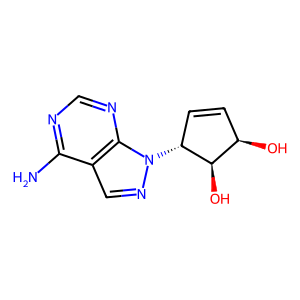

In [ ]:
print(df2_kdd['canonical_smiles'][4])
#dibujar molecula .png
from rdkit.Chem import Draw
Draw.MolToFile(molecula_0, 'molecula_0.png')
#guardar molecula .png
from IPython.display import Image
Image(filename='molecula_0.png')

## Resetear índices

In [5]:
df2_kdd = df2_kdd.reset_index()
df2_kdd.to_csv('chagas_02_bioactivity_data_preprocessed_diana2.csv', index=False)

#df2_kdd = pd.read_csv('chagas_02_bioactivity_data_preprocessed_diana2.csv', sep = ',')

### **Categorizar compuestos**
Los datos de bioactividad, consignados en la columna standard_value, están en unidades de IC50. Se clasifican estos valores en tres categorías. Los compuestos que tengan valores inferiores a 1.000 nM se considerarán **‘activos’**, Los valores entre 1.000 nM y 10.000 nM tendrán una categoría **‘NaN’** debido a que no se utilizarán, mientras que los valores superiores a 10.000 nM se considerarán **‘inactivos**’.

In [6]:
import numpy as np

df2_kdd['valor_bioactividad'] = ''
df2_kdd['standard_value'] = df2_kdd['standard_value'].astype(float)

df2_kdd['valor_bioactividad'] = np.where(df2_kdd['standard_value'] >= 10000, 'inactivo', np.where(df2_kdd['standard_value'] <= 1000, 'activo','NA' ))
df2_kdd = df2_kdd[(df2_kdd.valor_bioactividad == 'activo') | (df2_kdd.valor_bioactividad == 'inactivo')]
#reemplazar ceros con valor más pequeño
df2_kdd['standard_value'] = df2_kdd['standard_value'].replace(0.0, 0.06)
df2_kdd = df2_kdd.reset_index()
df2_kdd
#df4.drop(columns=['rango'])

<ipython-input-6-5d941d6a7d56>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_kdd['standard_value'] = df2_kdd['standard_value'].replace(0.0, 0.06)


,level_0,index,molecule_chembl_id,canonical_smiles,standard_value,valor_bioactividad
0,0,0,CHEMBL2111280,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0,inactivo
1,1,4,CHEMBL2111248,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O,12200.0,inactivo
2,2,7,CHEMBL2111283,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O,53000.0,inactivo
3,3,11,CHEMBL346319,Nc1ncnc2c1cnn2[C@@H]1C=C[C@H](O)C1,100000.0,inactivo
4,4,13,CHEMBL2111249,Nc1ncnc2c1cnn2[C@H]1C=C[C@H](O)[C@@H]1O,100000.0,inactivo
...,...,...,...,...,...,...
2096,2472,3172,CHEMBL4751188,CC(=O)NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4...,15300.0,inactivo
2097,2473,3173,CHEMBL4752255,CN(C)CCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c...,790.0,activo
2098,2474,3174,CHEMBL4785656,CNCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1,900.0,activo
2099,2475,3175,CHEMBL4751261,NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1,420.0,activo


In [7]:
#eliminar columna index y is_valid
df2_kdd = df2_kdd.drop(columns=['level_0', 'index'])

In [8]:
df2_kdd

,molecule_chembl_id,canonical_smiles,standard_value,valor_bioactividad
0,CHEMBL2111280,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0,inactivo
1,CHEMBL2111248,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O,12200.0,inactivo
2,CHEMBL2111283,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O,53000.0,inactivo
3,CHEMBL346319,Nc1ncnc2c1cnn2[C@@H]1C=C[C@H](O)C1,100000.0,inactivo
4,CHEMBL2111249,Nc1ncnc2c1cnn2[C@H]1C=C[C@H](O)[C@@H]1O,100000.0,inactivo
...,...,...,...,...
2096,CHEMBL4751188,CC(=O)NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4...,15300.0,inactivo
2097,CHEMBL4752255,CN(C)CCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c...,790.0,activo
2098,CHEMBL4785656,CNCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1,900.0,activo
2099,CHEMBL4751261,NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1,420.0,activo


## PARTE 2: **Instalación de conda**

In [9]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
!conda install -c rdkit rdkit -y
import sys

--2023-05-21 00:32:20--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   140MB/s    in 0.6s    

2023-05-21 00:32:21 (140 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

Eliminar columna *canonical_smiles* separando dos datasets

In [10]:
df_no_smiles = df2_kdd.drop(columns='canonical_smiles')

smiles = []

for i in df2_kdd.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [11]:
# segundo dataframe
df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,valor_bioactividad,canonical_smiles
0,CHEMBL2111280,100000.0,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O
1,CHEMBL2111248,12200.0,inactivo,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O
2,CHEMBL2111283,53000.0,inactivo,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O
3,CHEMBL346319,100000.0,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@H](O)C1
4,CHEMBL2111249,100000.0,inactivo,Nc1ncnc2c1cnn2[C@H]1C=C[C@H](O)[C@@H]1O
...,...,...,...,...
2096,CHEMBL4751188,15300.0,inactivo,CC(=O)NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4...
2097,CHEMBL4752255,790.0,activo,CN(C)CCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c...
2098,CHEMBL4785656,900.0,activo,CNCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1
2099,CHEMBL4751261,420.0,activo,NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1


## **Calcular descriptores de Lipinski**
Christopher Lipinski, un científico de Pfizer, ideó un conjunto de reglas empíricas para evaluar la similitud de los compuestos con las drogas. Tal semejanza con las drogas se basa en la Absorción, Distribución, Metabolismo y Excreción (ADME), que también se conoce como perfil farmacocinético. Lipinski analizó todos los medicamentos activos por vía oral aprobados por la FDA en la formulación de lo que se conocerá como la regla de los cinco o la regla de Lipinski.

La Regla de Lipinski establecía lo siguiente:

Peso molecular < 500 Dalton
Coeficiente de reparto octanol-agua (LogP) < 5
Donantes de enlaces de hidrógeno < 5
Aceptores de enlaces de hidrógeno < 10

In [15]:
#!pip install rdkit
"""
Lipinski:
    Peso Molecular          <= 500
    LogP                    <= 5
    Donadores de Hidrógeno  <= 5
    Aceptores de Hidrógeno  <= 10
"""
#from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, MolFromSmiles

ModuleNotFoundError: ignored

In [14]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
      try:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
      except:
        print(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["Peso_Molecular","LogP","Num_Donadores_H","Num_Aceptores"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

df_lipinski = lipinski(df2_kdd.canonical_smiles)
#convertir Num_Donadores_H y Num_Aceptores a enteros
df_lipinski[['Num_Donadores_H', 'Num_Aceptores']] = df_lipinski[['Num_Donadores_H', 'Num_Aceptores']].astype(int)
df_lipinski

UnboundLocalError: ignored

### **Unión de datasets**
Se unen los datasets

In [ ]:
df_combined = pd.concat([df_clean_smiles ,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,standard_value,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores
0,CHEMBL2111280,100000.0,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0
1,CHEMBL2111248,12200.0,inactivo,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O,249.274,-0.2888,3.0,7.0
2,CHEMBL2111283,53000.0,inactivo,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O,251.246,-1.5640,4.0,8.0
3,CHEMBL346319,100000.0,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@H](O)C1,217.232,0.2704,2.0,6.0
4,CHEMBL2111249,100000.0,inactivo,Nc1ncnc2c1cnn2[C@H]1C=C[C@H](O)[C@@H]1O,233.231,-0.7588,3.0,7.0
...,...,...,...,...,...,...,...,...
2096,CHEMBL4751188,15300.0,inactivo,CC(=O)NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4...,384.564,5.5211,0.0,3.0
2097,CHEMBL4752255,790.0,activo,CN(C)CCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c...,370.537,5.1789,1.0,3.0
2098,CHEMBL4785656,900.0,activo,CNCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1,356.510,4.9182,1.0,3.0
2099,CHEMBL4751261,420.0,activo,NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1,400.482,3.8786,2.0,4.0


### **Convertir IC50 a pIC50**
Para permitir que los datos de **IC50** se distribuyan de manera más uniforme, convertiremos **IC50** a la escala logarítmica negativa que es esencialmente **-log10(IC50)**.

Esta función pIC50() recibe el dataset como parámetro de entrada.
* Toma el valor de IC50 desde la columna ``standard_value`` y la convierte desde nM a M y luego multiplica el valor por 10$^{-9}$
* Toma el valor molar y luego aplica el -log10
* Se borra la columna ``standard_value`` y se reemplaza por la columna ``pIC50``

In [ ]:
df_combined.standard_value.describe()

count    2.101000e+03
mean     1.488199e+04
std      3.929167e+04
min      1.000000e-02
25%      1.020000e+00
50%      5.000000e+00
75%      1.370000e+04
max      1.030000e+06
Name: standard_value, dtype: float64

In [ ]:
#Los valores superiores a 100 000 000 se fijarán en 100 000 000; de lo contrario, el valor logarítmico negativo se volverá negativo.
-np.log10( (10**-9)* 100000000 )
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
def normalizar_pic50(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_pic50'] = norm
    x = input.drop('standard_value', 1)
        
    return x

df_pic50 = normalizar_pic50(df_combined)
df_pic50

<ipython-input-77-e6da4e6cda38>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,standard_value_pic50
0,CHEMBL2111280,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0,100000.0
1,CHEMBL2111248,inactivo,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O,249.274,-0.2888,3.0,7.0,12200.0
2,CHEMBL2111283,inactivo,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O,251.246,-1.5640,4.0,8.0,53000.0
3,CHEMBL346319,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@H](O)C1,217.232,0.2704,2.0,6.0,100000.0
4,CHEMBL2111249,inactivo,Nc1ncnc2c1cnn2[C@H]1C=C[C@H](O)[C@@H]1O,233.231,-0.7588,3.0,7.0,100000.0
...,...,...,...,...,...,...,...,...
2096,CHEMBL4751188,inactivo,CC(=O)NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4...,384.564,5.5211,0.0,3.0,15300.0
2097,CHEMBL4752255,activo,CN(C)CCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c...,370.537,5.1789,1.0,3.0,790.0
2098,CHEMBL4785656,activo,CNCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1,356.510,4.9182,1.0,3.0,900.0
2099,CHEMBL4751261,activo,NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1,400.482,3.8786,2.0,4.0,420.0


In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_pic50']:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_pic50', 1)
        
    return x

df_final = pIC50(df_pic50)
df_final

<ipython-input-78-98f6a29b0c48>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_pic50', 1)


,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,CHEMBL2111280,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0,4.000000
1,CHEMBL2111248,inactivo,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O,249.274,-0.2888,3.0,7.0,4.913640
2,CHEMBL2111283,inactivo,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O,251.246,-1.5640,4.0,8.0,4.275724
3,CHEMBL346319,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@H](O)C1,217.232,0.2704,2.0,6.0,4.000000
4,CHEMBL2111249,inactivo,Nc1ncnc2c1cnn2[C@H]1C=C[C@H](O)[C@@H]1O,233.231,-0.7588,3.0,7.0,4.000000
...,...,...,...,...,...,...,...,...
2096,CHEMBL4751188,inactivo,CC(=O)NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4...,384.564,5.5211,0.0,3.0,4.815309
2097,CHEMBL4752255,activo,CN(C)CCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c...,370.537,5.1789,1.0,3.0,6.102373
2098,CHEMBL4785656,activo,CNCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1,356.510,4.9182,1.0,3.0,6.045757
2099,CHEMBL4751261,activo,NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c2)n1,400.482,3.8786,2.0,4.0,6.376751


In [ ]:
df_final.to_csv('chagas_04_bioactivity_data_3class_pIC50_diana2.csv')

### **Eliminar valores NaN de la columna valor_bioactividad**
Aquí, eliminaremos el valor ``NaN`` de nuestro conjunto de datos.

In [ ]:
df2 = df_final.dropna()
df2.reset_index()
df2
df2.to_csv('chagas_05_bioactivity_data_2class_pIC50_diana2.csv')

In [16]:
df2 = pd.read_csv('chagas_05_bioactivity_data_2class_pIC50_diana2.csv', sep= ',')

In [17]:
#leer csv
import pandas as pd
from pandas import read_csv
df2 = read_csv('chagas_05_bioactivity_data_2class_pIC50_diana2.csv', sep=',')

## **Análisis de datos exploratorios (Análisis del espacio químico) a través del descriptor de Lipinski**

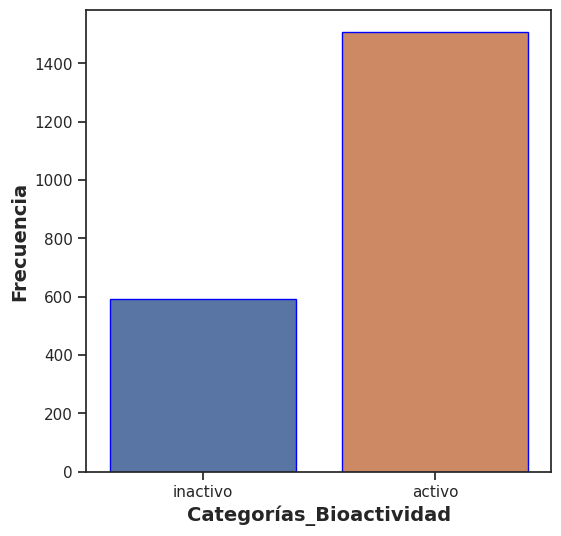

In [18]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


### **Diagrama de frecuencias para las dos categorías**
#dibujar grafica .png
plt.figure(figsize=(6, 6))
#calbiar colores de barras a morado y amarillo
sns.countplot(x='valor_bioactividad', data=df2, edgecolor='blue') #facecolor='blue'
#sns.countplot(x='valor_bioactividad', data=df2, palette = 'hls', edgecolor = 'black')
plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')
#cambiar colores de la grafica
sns.set_palette("pastel")

Text(0, 0.5, 'Categorías_Bioactividad')

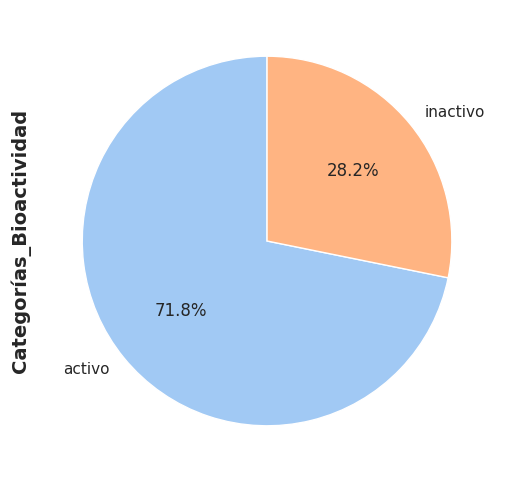

In [19]:
#Se construye un pie chart para visualizar la distribución de las dos clases
plt.figure(figsize=(6,6))
#se cambia el color de las barras a morado y amarillo
sns.set_palette("pastel")
#se dibuja el pie chart
df2.valor_bioactividad.value_counts().plot.pie(autopct='%1.1f%%', shadow=False, explode=(0.0,0), startangle=90)
#rotar el pie chart 10 grados
plt.xticks(rotation=90)
#contorno de la grafica azul
plt.rcParams['patch.edgecolor'] = 'blue'
plt.ylabel('Categorías_Bioactividad', fontsize=14, fontweight='bold')
# plt.savefig('pie_chart_categorias_bioactividad.png')
# #guardar pie chart .png
# Image(filename='pie_chart_categorias_bioactividad.png')


### **Diagrama de puntos Peso_Molecular vs LogP**
Puede verse que las 2 categorías de bioactividad abarcan espacios químicos similares, como lo demuestra el diagrama de dispersión de Peso_Molecular frente a LogP.

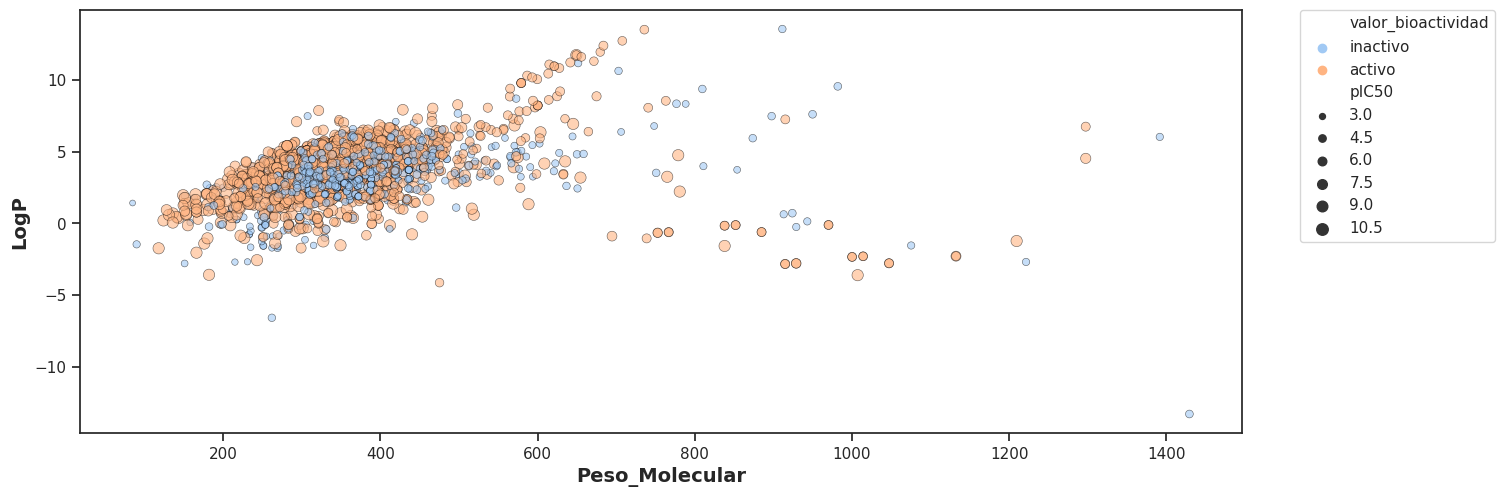

In [20]:
plt.figure(figsize=(15, 5.5))
sns.scatterplot(x='Peso_Molecular', y='LogP', data=df2, hue='valor_bioactividad', size='pIC50', edgecolor='black', alpha=0.6, facecolor = 'red')
plt.xlabel('Peso_Molecular', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
# plt.savefig('plot_Peso_Molecular_vs_LogP.png')
# #guardar gráfica .png
# Image(filename='plot_Peso_Molecular_vs_LogP.png')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


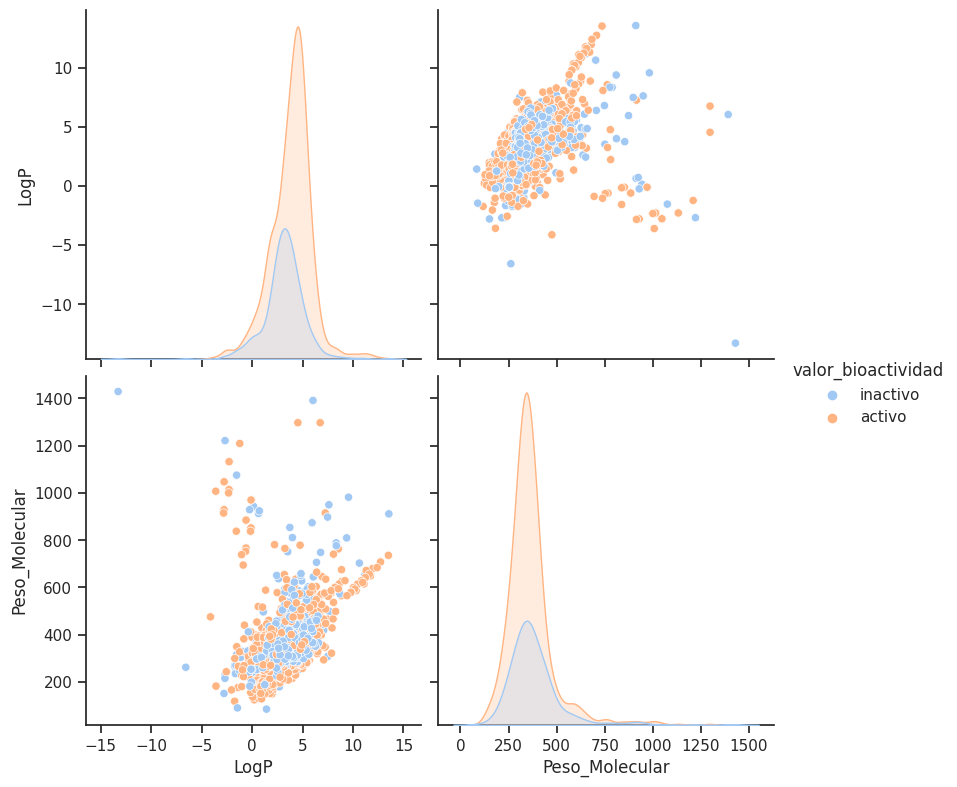

In [21]:
sb.pairplot(df2.dropna(),hue='valor_bioactividad',size=4,vars=["LogP","Peso_Molecular"],kind="scatter")
#guardar gráfica .png
# plt.savefig('plot_Peso_Molecular_vs_LogP_1.png')
# Image(filename='plot_Peso_Molecular_vs_LogP_1.png')

### **Box plots**
#### **PIC50**

In [22]:
# crear dos dataframes, uno para cada clase
# df_2_activo = df2[df2['valor_bioactividad']=='activo']
# df_2_inactivo = df2[df2['valor_bioactividad']=='inactivo']


# df2.valor_bioactividad.value_counts()

#seleccionar las clases con 592 elementos aleatorios
df2_activo = df2[df2.valor_bioactividad == 'activo'].sample(592)
df2_inactivo = df2[df2.valor_bioactividad == 'inactivo']

#concatenar los dos dataframes
df2 = pd.concat([df2_activo, df2_inactivo], axis=0)
df2 = df2.reset_index(drop=True)
df2

,Unnamed: 0,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,1049,CHEMBL1862293,activo,COc1ccc(-c2nc(CNCCC3CCCN3C)c(C)o2)cc1,329.444,3.23252,1.0,5.0,8.612610
1,642,CHEMBL1860458,activo,C=CCc1ccc(Oc2ccc(/C(=N/O)NCc3ccncc3)cn2)c(OC)c1,362.433,4.31790,2.0,5.0,8.677781
2,431,CHEMBL12,activo,CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21,339.479,4.27550,0.0,3.0,10.221849
3,471,CHEMBL1586,activo,C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@...,367.446,2.22890,2.0,6.0,10.221849
4,865,CHEMBL1858111,activo,CCc1ccccc1Oc1ncccc1/C(=N\O)NC1CCCCC1,238.718,2.79750,1.0,2.0,8.667562
...,...,...,...,...,...,...,...,...,...
1179,2092,CHEMBL4741629,inactivo,Cc1ccoc1C(=O)NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C...,478.608,6.52860,1.0,3.0,4.698970
1180,2093,CHEMBL4745808,inactivo,O=C(NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c...,460.618,6.38950,1.0,3.0,4.698970
1181,2094,CHEMBL4751868,inactivo,O=C(NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)C4)c...,426.601,5.87580,1.0,3.0,4.698970
1182,2095,CHEMBL4752913,inactivo,CCCC(=O)NCCc1csc(-c2ccc(F)c(C34CC5CC(CC(C5)C3)...,398.547,5.09560,1.0,3.0,4.602060


In [23]:
df2 = df2.drop(columns = {'Unnamed: 0'})

Text(0, 0.5, 'valor_PIC50')

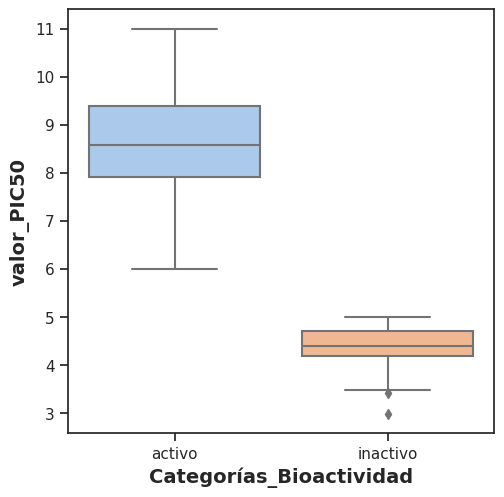

In [24]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'valor_bioactividad', y = 'pIC50', data = df2)
plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold', )
plt.ylabel('valor_PIC50', fontsize=14, fontweight='bold')
# plt.savefig('plot_ic50.png')
# Image(filename='plot_ic50.png')

Text(0, 0.5, 'Peso_Molecular')

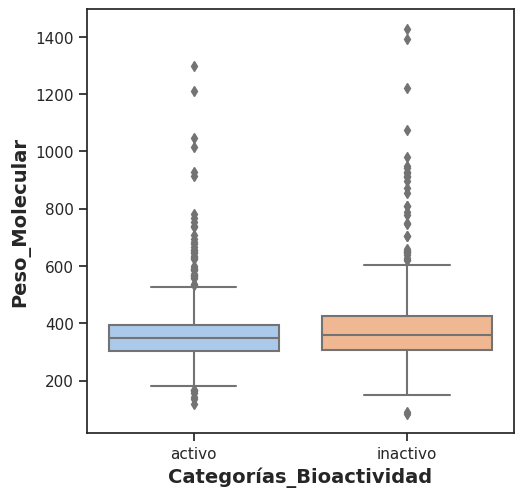

In [25]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'valor_bioactividad', y = 'Peso_Molecular', data = df2)
plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Peso_Molecular', fontsize=14, fontweight='bold')
# plt.savefig('plot_MW.png')
# Image(filename='plot_MW.png')

Text(0.5, 1.0, 'histogramas para la clase inactivo y activo')

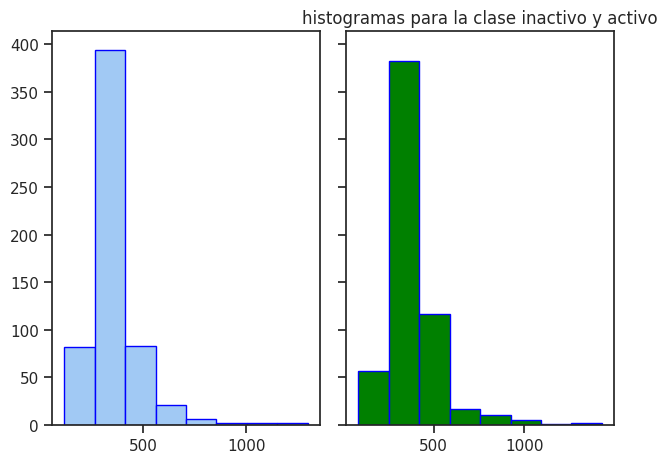

In [26]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df2_activo['Peso_Molecular'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df2_inactivo['Peso_Molecular'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo', loc='center')
# plt.savefig('histograma.png')
# Image(filename='histograma.png')

#### **LogP**

Text(0, 0.5, 'LogP')

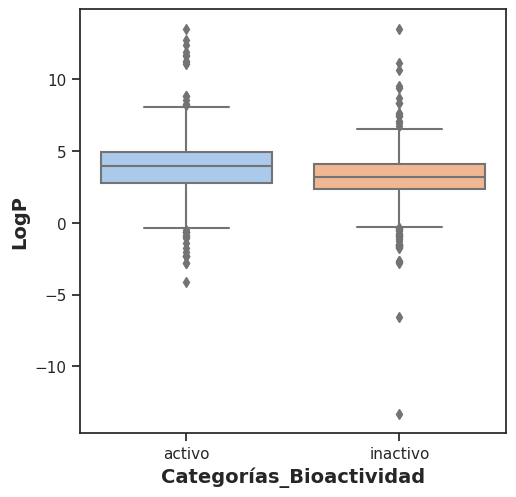

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'valor_bioactividad', y = 'LogP', data = df2)
plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
# plt.savefig('plot_LogP.png')
# Image(filename='plot_LogP.png')

Text(0.5, 1.0, 'histogramas para la clase inactivo y activo')

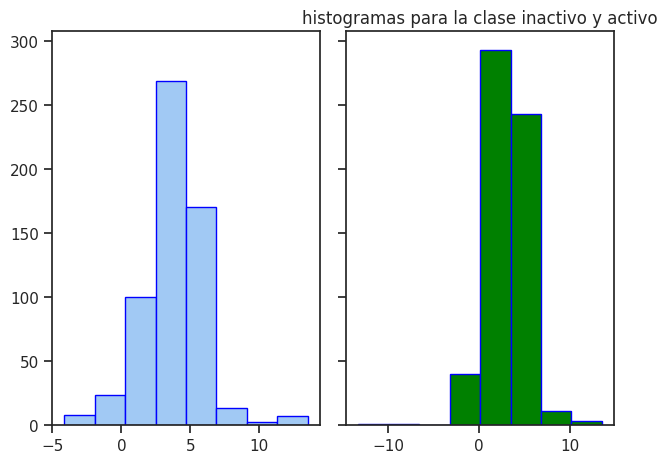

In [ ]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df2_activo['LogP'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df2_inactivo['LogP'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo')
# plt.savefig('plot_LogP.png')
# Image(filename='plot_LogP.png')

#### **Num_Donadores_Hidrógeno**

Text(0, 0.5, 'Num_Donadores_Hidrógeno')

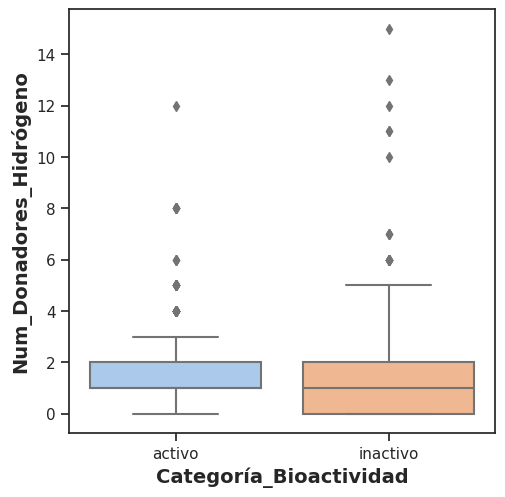

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'valor_bioactividad', y = 'Num_Donadores_H', data = df2)
plt.xlabel('Categoría_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Num_Donadores_Hidrógeno', fontsize=14, fontweight='bold')
# plt.savefig('plot_NumHDonors.png')
# Image(filename='plot_NumHDonors.png')

(array([409., 125.,  39.,  13.,   0.,   3.,   2.,   1.]),
 array([ 0.   ,  1.875,  3.75 ,  5.625,  7.5  ,  9.375, 11.25 , 13.125,
        15.   ]),
 <BarContainer object of 8 artists>)

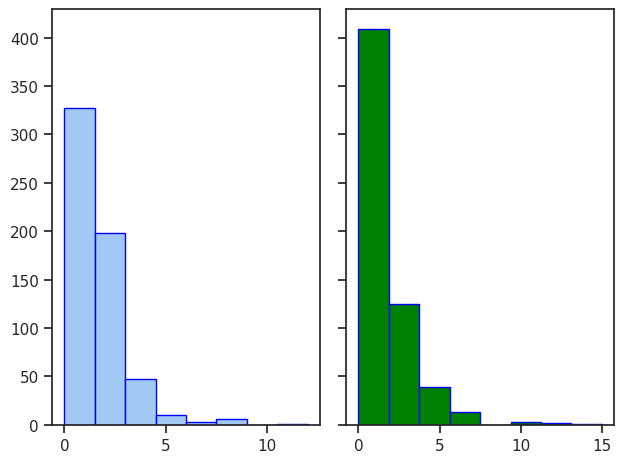

In [ ]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df2_activo['Num_Donadores_H'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df2_inactivo['Num_Donadores_H'], bins=n_bins,color='green')
# plt.savefig('plot_NumHDonors.png')
# Image(filename='plot_NumHDonors.png')

#### **Num_Aceptores**

Text(0, 0.5, 'Numero_Aceptores_Hidrógeno')

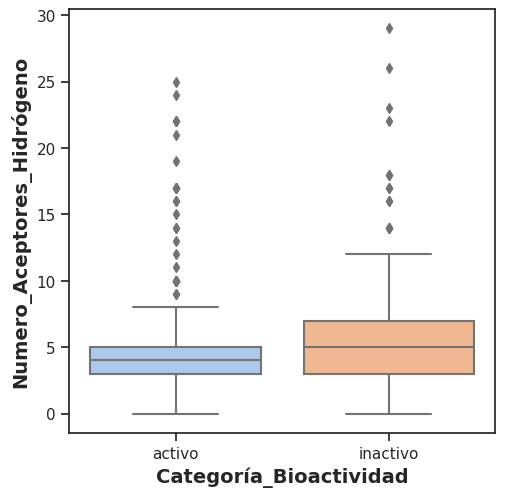

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'valor_bioactividad', y = 'Num_Aceptores', data = df2)
plt.xlabel('Categoría_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Numero_Aceptores_Hidrógeno', fontsize=14, fontweight='bold')
# plt.savefig('plot_NumHAcceptors.png')
# Image(filename='plot_NumHAcceptors.png')

Text(0.5, 1.0, 'histogramas para la clase inactivo y activo')

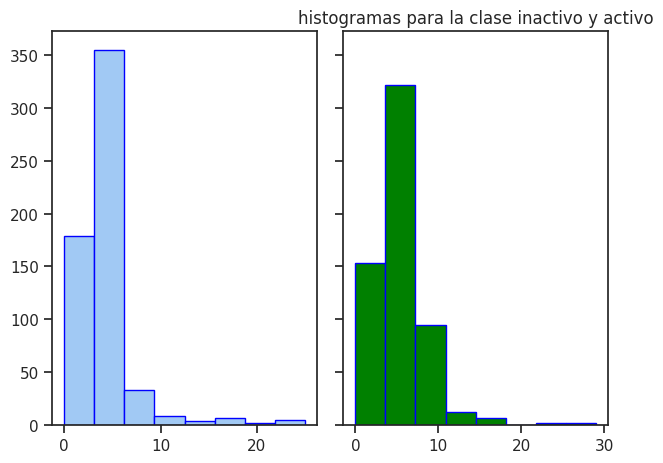

In [ ]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df2_activo['Num_Aceptores'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df2_inactivo['Num_Aceptores'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo')
# plt.savefig('plot_NumHAcceptors.png')
# Image(filename='plot_NumHAcceptors.png')

## Calculo Lipinski

In [27]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

mols = []

for i in df2.canonical_smiles:
        mol = MolFromSmiles(i)
        mols.append(mol)
        #print(df2)
ID = df2.molecule_chembl_id
STATUS = df2.valor_bioactividad
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

data = pd.DataFrame(
    {'molecule_chembl_id': ID,
     'STATUS' : STATUS,
     'MW': MW, 
     'LogP': LogP,
     'nHAcc': nHAcc,
     'nHDon': nHDon
    })
data = data[['molecule_chembl_id','STATUS','MW','LogP','nHAcc','nHDon']]

ModuleNotFoundError: ignored

In [ ]:
data.shape

(1184, 6)

## Distribución de Frecuencias variables

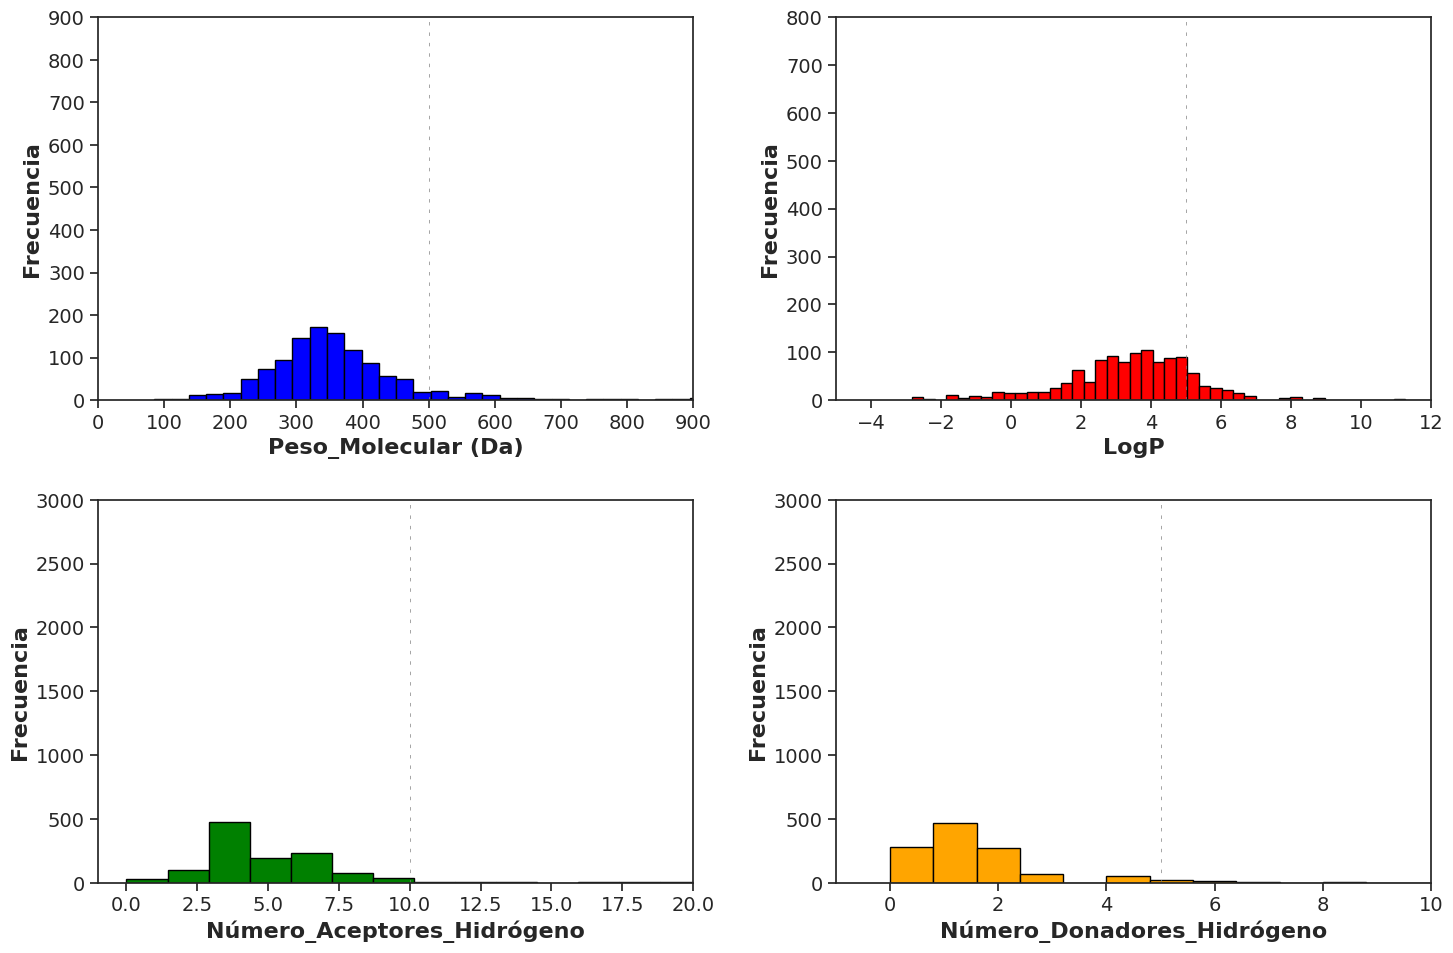

In [ ]:
figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)

# Histograma para MW
hist, bins = np.histogram(MW, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt1.bar(center, hist, align='center', width=width, color='blue',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt1.set_xlabel('Peso_Molecular (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
plt1.set_xlim(0,900)
plt1.set_ylim(0, 900)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histograma para LogP
hist, bins = np.histogram(LogP, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt2.bar(center, hist, align='center', width=width, color='red',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlim(-5,12)
plt2.set_ylim(0,800)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histograma para Donadores de Hidrógeno
hist, bins = np.histogram(nHDon, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt4.bar(center, hist, align='center', width=width, color='orange',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt4.set_xlabel('Número_Donadores_Hidrógeno', fontsize=16, fontweight='bold')
plt4.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlim(-1,10)
plt4.set_ylim(0,3000)
#plt4.grid(True)
plt4.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histograma para nHAcc
hist, bins = np.histogram(nHAcc, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt3.bar(center, hist, align='center', width=width, color='green',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt3.set_xlabel('Número_Aceptores_Hidrógeno', fontsize=16, fontweight='bold')
plt3.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlim(-1,20)
plt3.set_ylim(0,3000)
#plt3.grid(True)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
# plt.savefig('plot_descriptores.png')
# Image(filename='plot_descriptores.png')

## ??????

In [ ]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

ID = df2.molecule_chembl_id
STATUS = df2.valor_bioactividad

mols = []

for i in df2.canonical_smiles:
        mol = MolFromSmiles(i)
        mols.append(mol)
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

print(nHDon)

data = pd.DataFrame(
    {'molecule_chembl_id': ID,
     'valor_bioactividad' : STATUS,
     'Peso_Molecular': MW, 
     'LogP': LogP,
     'Num_Aceptores': nHAcc,
     'Num_Donadores_H': nHDon
    })

[1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 12, 4, 0, 0, 5, 2, 1, 4, 0, 1, 1, 2, 0, 4, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 4, 1, 0, 4, 1, 1, 0, 0, 1, 4, 2, 1, 3, 2, 1, 1, 2, 3, 2, 5, 3, 1, 1, 0, 4, 8, 2, 2, 2, 1, 1, 8, 1, 1, 2, 2, 2, 8, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 5, 2, 1, 1, 1, 1, 2, 1, 2, 4, 1, 0, 2, 1, 1, 12, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 5, 2, 3, 2, 1, 3, 2, 1, 1, 1, 2, 4, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 1, 1, 1, 1, 5, 0, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 8, 2, 1, 2, 1, 2, 3, 0, 0, 2, 2, 3, 1, 2, 1, 3, 1, 1, 3, 2, 1, 2, 1, 16, 1, 1, 1, 1, 1, 4, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 3, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 4, 2, 1, 3, 2, 0, 6, 4, 1, 1, 1, 4, 4, 0, 0, 1, 2, 3, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 3, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 1, 2, 1, 0, 5, 

## Gráficas de densidad para cada medición PIC50 (Estimación Kernel)

<ipython-input-105-146bbd3d3f02>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df2_activo['pIC50'], rug=True, hist=False,label='PIC50 clase activa',color='blue')
<ipython-input-105-146bbd3d3f02>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df2_inactivo['pIC50']

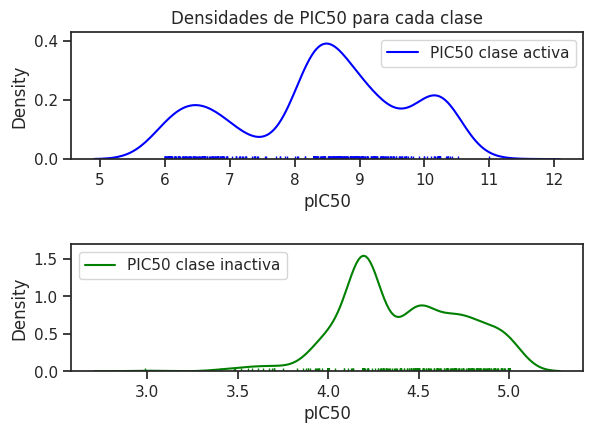

In [ ]:
plt.figure()
plt.subplot(2, 1,1)
plt.title('Densidades de PIC50 para cada clase')
ax = sns.distplot(df2_activo['pIC50'], rug=True, hist=False,label='PIC50 clase activa',color='blue')
plt.legend()
plt.subplot(2, 1,2)
ax = sns.distplot(df2_inactivo['pIC50'], rug=True, hist=False,label='PIC50 clase inactiva',color='green')
plt.legend()
plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
# plt.savefig('densidad_pic50.png')
# Image(filename='densidad_pic50.png')

## Análisis inferencial
En esta sección se van a analizar inferencialmnete  a la variable *PIC50* para la clase activo e inactivo. Por lo tanto, se cargan las siguientes librerías

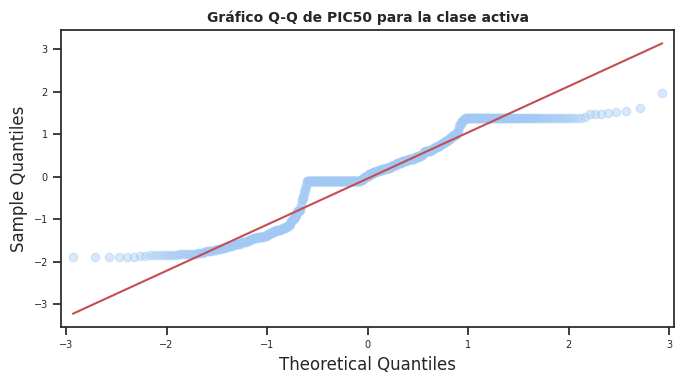

In [ ]:
#Se va a construir los QQ-plot para  'PIC50' en cada una de las  clases
#Esto se hace con el objetivo de analizar si los cuantiles teóricos ccoinciden con los cuantiles muestrales 
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(df2_activo['pIC50'],fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de PIC50 para la clase activa', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.tight_layout()
# plt.savefig('qqplot_activo.png')
# Image(filename='qqplot_activo.png')

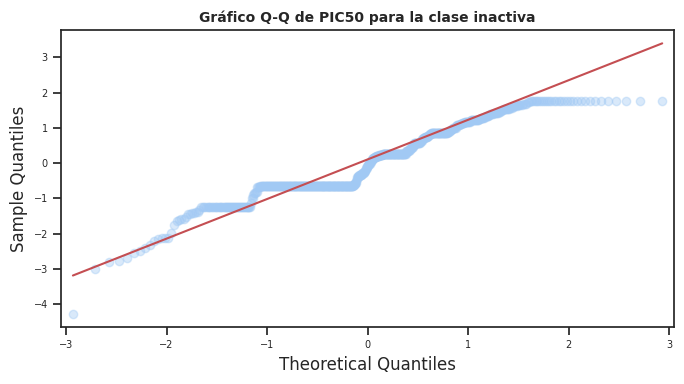

In [ ]:
#Se va a construir los QQ-plot para  'PIC50' en cada una de las  clases
#Esto se hace con el objetivo de analizar si los cuantiles teóricos ccoinciden con los cuantiles muestrales 
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(df2_inactivo['pIC50'],fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de PIC50 para la clase inactiva', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.tight_layout()
# plt.savefig('qqplot_inactivo.png')
# Image(filename='qqplot_inactivo.png')

Se puede apreciar que  empíricamente los cuantiles muestrales de **PIC50** de la clase **inactiva** no se ajustan bien a los cuantiles teóricos de la distribución normal 

In [ ]:
# Test de Shapiro-Wilk  (clase activa)
# ==============================================================================
shapiro_test = stats.shapiro(df2_activo['pIC50'])
shapiro_test

ShapiroResult(statistic=0.9259680509567261, pvalue=1.732070674665125e-16)

En este caso el $$p-valor=0.9259680509567261*10^{-16}$$ 
Luego, a un nivel de significancia de $$\alpha=0.05$$
Se tiene que: $$p-valor=0.9259680509567261*10^{-16}<0.05=\alpha$$
Por lo tanto, se rechaza la hipótesis  nula. Es decir, que como se había apreciada empíricamente la muestra no viene de una población con distribución normal. Por lo tanto, existe evidencia estadística para deducir que la variable **PIC50** de la clase activa no tiene una distribución normal.

In [ ]:
# Test de Shapiro-Wilk  (clase inactiva)
# ==============================================================================
shapiro_test = stats.shapiro(df2_inactivo['pIC50'])
shapiro_test

ShapiroResult(statistic=0.944952130317688, pvalue=5.0976719590326014e-14)

En este caso el $$p-valor=1.5192948015132883*10^{-39}$$ 
Luego, a un nivel de significancia de $$\alpha=0.05$$
Se tiene que: $$p-valor=1.5192948015132883*10^{-39}<0.05=\alpha$$
Por lo tanto, se rechaza la hipótesis  nula. Es decir, que como se había apreciada empíricamente la muestra no viene de una población con distribución normal. Por lo tanto, existe evidencia estadística para deducir que la variable **PIC50** de la clase activa no tiene una distribución normal.

## TEST MANWHITNEY

In [ ]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# Establecer semilla
  seed(1)

# Activos e inactivos
  selection = [descriptor, 'valor_bioactividad']
  df = df2[selection]
  activo = df[df['valor_bioactividad'] == 'activo']
  activo = activo[descriptor]

  selection = [descriptor, 'valor_bioactividad']
  df = df2[selection]
  inactivo = df[df['valor_bioactividad'] == 'inactivo']
  inactivo = inactivo[descriptor]

# Comparar muestras
  stat, p = mannwhitneyu(activo, inactivo)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretación de resultados
  alpha = 0.05
  if p > alpha:
    resultado = 'Misma distribución (no rechazar H0)'
  else:
    resultado = 'Diferente distribución (rechazar H0)'
  
  results = pd.DataFrame({'Variable':descriptor,
                          'Resultado':stat,
                          'p-value':p,
                          'alpha':alpha,
                          'Interpretación':resultado}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('Peso_Molecular')

,Variable,Resultado,p-value,alpha,Interpretación
0,Peso_Molecular,158691.0,0.004929,0.05,Diferente distribución (rechazar H0)


In [ ]:
mannwhitney('LogP')

,Variable,Resultado,p-value,alpha,Interpretación
0,LogP,214247.0,3.314564e-11,0.05,Diferente distribución (rechazar H0)


In [ ]:
mannwhitney('Num_Donadores_H')

,Variable,Resultado,p-value,alpha,Interpretación
0,Num_Donadores_H,213527.5,9.875864e-12,0.05,Diferente distribución (rechazar H0)


In [ ]:
mannwhitney('Num_Aceptores')

,Variable,Resultado,p-value,alpha,Interpretación
0,Num_Aceptores,129432.5,3.180743e-15,0.05,Diferente distribución (rechazar H0)


In [ ]:
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-05-15 15:43:11--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-05-15 15:43:11--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.08s   

2023-05-15 15:43:11 (299 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-05-15 15:43:11--  https://github

In [ ]:
df3 = pd.read_csv('chagas_04_bioactivity_data_3class_pIC50_diana2.csv')
#eliminar columnas con 'Uname: 0'
df3 = df3.drop(columns=['Unnamed: 0'])
df3.head(3)

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,CHEMBL2111280,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0,4.000000
1,CHEMBL2111248,inactivo,C[C@H]1C[C@@H](n2ncc3c(N)ncnc32)[C@H](O)[C@@H]1O,249.274,-0.2888,3.0,7.0,4.913640
2,CHEMBL2111283,inactivo,Nc1ncnc2c1cnn2[C@H]1C[C@@H](O)[C@H](O)[C@@H]1O,251.246,-1.5640,4.0,8.0,4.275724


In [ ]:
df3.shape

(2101, 8)

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df2_selection = df2[selection]
df2_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
!cat molecule.smi | head -5

Cc1cc(=O)n2nc(-c3cccc(F)c3)cc2[nH]1	CHEMBL1862278
CC(C)(C)C1=CC2Cc3nc4ccccc4c(N)c3C(C1)C2	CHEMBL1684454
CCCCc1ccc(-c2nc(C)c(C(C)=O)o2)cc1	CHEMBL1861183
COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2OC(C)=O)cc1	CHEMBL23
CCCCc1ccc(-c2nc(CNCc3ccncc3)co2)cc1	CHEMBL1860502


## **Calcular fingerprints y descriptores**

In [ ]:
!cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
! bash padel.sh

Processing CHEMBL1862278 in molecule.smi (1/1184). 
Processing CHEMBL1684454 in molecule.smi (2/1184). 
Processing CHEMBL1861183 in molecule.smi (3/1184). Average speed: 3.23 s/mol.
Processing CHEMBL23 in molecule.smi (4/1184). Average speed: 1.89 s/mol.
Processing CHEMBL1860502 in molecule.smi (5/1184). Average speed: 1.39 s/mol.
Processing CHEMBL1859209 in molecule.smi (7/1184). Average speed: 1.06 s/mol.
Processing CHEMBL1684453 in molecule.smi (6/1184). Average speed: 1.31 s/mol.
Processing CHEMBL1858840 in molecule.smi (8/1184). Average speed: 1.04 s/mol.
Processing CHEMBL1862671 in molecule.smi (9/1184). Average speed: 0.93 s/mol.
Processing CHEMBL1859332 in molecule.smi (10/1184). Average speed: 0.89 s/mol.
Processing CHEMBL1861281 in molecule.smi (11/1184). Average speed: 0.80 s/mol.
Processing CHEMBL2035555 in molecule.smi (12/1184). Average speed: 0.75 s/mol.
Processing CHEMBL1859878 in molecule.smi (13/1184). Average speed: 0.69 s/mol.
Processing CHEMBL1860138 in molecule.sm

## **Preparando las Matrices de Datos X e Y**

### **X matriz**

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X = df3_X.drop(columns=['Name'])
df3_X
df3_X.shape

(1184, 881)

## **Y variable**

In [ ]:
df3_Y = df2['pIC50']
df3_Y

0        8.301030
1        6.055517
2        8.301030
3       10.221849
4        8.301030
          ...    
1179     4.698970
1180     4.698970
1181     4.698970
1182     4.602060
1183     4.815309
Name: pIC50, Length: 1184, dtype: float64

## **Unir datasets**

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.301030
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.055517
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.221849
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.698970
1180,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.698970
1181,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.698970
1182,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060


In [ ]:
# Exportar a .csv
dataset3.to_csv('reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_882_diana2.csv', index=False)

#PARTE 4

## **Importar librerías**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_882_diana2.csv')
df.shape

(1184, 882)

## **882 Fingerprints para Chagas**

### **Variables de entrada**

In [ ]:
X = df.drop('pIC50', axis=1)
X.head(3)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df.pIC50
Y.head(3)

0    8.301030
1    6.055517
2    8.301030
Name: pIC50, dtype: float64

### **Eliminar varianzas muy bajas**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
#resultado
X.shape #No se elimina ningún registro con varianza baja

(1184, 166)

## **Dividir conjunto de datos en 80% y 20%**

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((947, 166), (947,), (237, 166), (237,))

## **Modelo de Regresión Lineal usando Random Forest**

In [ ]:
#model = RandomForestRegressor(n_estimators=100)
import numpy as np
model = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=0, criterion='squared_error',  min_samples_split=2)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5903709177143217

In [ ]:
model.estimators_

[DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=209652396),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=398764591),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=924231285),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=1478610112),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=441365315),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=1537364731),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=192771779),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=1491434855),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=1819583497),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=530702035),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=626610453),
 DecisionTreeRegressor(max_depth=16, max_features=1.0, random_state=1650906866),
 DecisionTreeRegressor(max_depth=16

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  
model1 = DecisionTreeRegressor(random_state=12, max_depth=4, max_leaf_nodes=16, min_samples_leaf=4, splitter='random')
model1.fit(X_train, Y_train)
predictions = model1.predict(X_test)

#r2 = model1.score(X_test, Y_test)

score = model1.score(X_test, Y_test)
print(score)
# from sklearn.tree import plot_tree
# plt.figure(figsize=(10,8), dpi=150)
# plot_tree(model, feature_names=X.columns)

0.38385826280739277


In [ ]:
#Modelo No2
from sklearn import linear_model
modelo2=linear_model.LinearRegression()
modelo2.fit(X_train,Y_train)
modelo2.predict(X_test)

modelo2.score(X_test,Y_test)

-5.0041952288068275e+17

In [ ]:
#otro modelo usando redes neuronales
from sklearn.neural_network import MLPRegressor
Modelo3=MLPRegressor(random_state=1,max_iter=90).fit(X_train,Y_train)
Modelo3.score(X_test,Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5387456729691642

In [ ]:
Modelo3.predict(X_test)

array([6.67711575, 8.22082314, 7.10918875, 3.97655744, 6.61044221,
       5.07451252, 4.63009914, 8.56330556, 7.53930183, 7.86485949,
       3.75275995, 8.02933892, 9.07897938, 7.94554577, 8.66025412,
       3.99073483, 8.77229763, 8.02266666, 4.10655773, 4.52952163,
       3.64922503, 8.24879409, 5.49677141, 5.14970251, 8.62156754,
       5.12720674, 6.07556873, 8.52467705, 8.9092909 , 8.57978089,
       4.45749219, 4.54826331, 4.83445692, 4.50577961, 4.06181612,
       8.12167205, 8.37778179, 7.54324819, 5.8462865 , 8.95764584,
       8.623901  , 7.54688216, 4.88649116, 4.81392021, 5.76720403,
       7.25523066, 9.42327049, 4.25766556, 8.27585433, 8.24833618,
       4.0687731 , 4.60254302, 5.4578759 , 4.02339869, 5.63426341,
       6.27634358, 4.62940781, 8.38799848, 5.70693113, 8.3232143 ,
       6.48728076, 9.00338243, 4.67890172, 6.82931917, 4.34607447,
       6.70274582, 4.6182566 , 3.87870206, 7.52642259, 6.52333049,
       4.87959751, 8.09233202, 5.78316966, 5.65289356, 7.41948

In [ ]:
#Modelo bayesiano
from sklearn import linear_model
from os import X_OK
modelo4=linear_model.BayesianRidge()
modelo4.fit(X_train,Y_train)
modelo4.predict(X_test)
modelo4.score(X_test,Y_test)

0.5121860468280932

## **Graficar valores Experimental vs predicho para valores de pIC50**

In [ ]:
Y_test.shape

(237,)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('PIC50 Experimental', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicción PIC50 ', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

TypeError: ignored

##Implementar Segundos descriptores

In [ ]:
# !pip install mordred -U
# !pip install rdkit-pypi

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
#from mordred import Calculator, descriptors
#import mordred as mordred


def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        try:
          mol=Chem.AddHs(mol)
          # Calculate all 200 descriptors for each molecule
          descriptors = calc.CalcDescriptors(mol)
          Mol_descriptors.append(descriptors)
        except:
          print(1)
    return Mol_descriptors,desc_names 

# Function call





[16:01:26] SMILES Parse Error: syntax error while parsing: None
[16:01:26] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'


1


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df2[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)
Mol_descriptors,desc_names = RDkit_descriptors(df2['canonical_smiles'])

In [ ]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.065497,14.065497,0.166295,-3.022711,0.711458,243.241,233.161,243.080790,90,0,...,0,0,0,0,0,0,0,0,0,0
1,9.453068,9.453068,0.469258,-4.466544,0.705640,292.426,268.234,292.193949,114,0,...,0,0,0,0,0,0,0,0,0,0
2,12.266218,12.266218,0.949968,-3.950491,0.753977,257.333,238.181,257.141579,100,0,...,0,0,0,0,0,0,0,0,0,0
3,14.873300,14.873300,0.563663,-4.642342,0.675792,414.527,388.319,414.161328,154,0,...,1,0,0,0,0,0,0,0,0,0
4,8.378757,8.378757,0.488461,-3.983693,0.669168,321.424,298.240,321.184112,124,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,16.892952,16.892952,0.113073,-4.586652,0.466325,464.606,435.374,464.193377,172,0,...,0,0,0,0,0,1,0,0,0,0
1180,16.888555,16.888555,0.122540,-4.591670,0.437739,478.608,450.384,478.189041,176,0,...,0,0,0,0,0,1,0,0,0,0
1181,16.898936,16.898936,0.101707,-4.581290,0.463105,460.618,431.386,460.198463,170,0,...,0,0,0,0,0,1,0,0,0,0
1182,16.852129,16.852129,0.173357,-4.609179,0.600996,426.601,395.353,426.214113,160,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_with_200_descriptors['pIC50'] = df2['pIC50']
df_with_200_descriptors.to_csv('reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_200_diana2.csv', sep=',')

In [ ]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [ ]:
Morgan_fpts = morgan_fpts(df3_selection['canonical_smiles'])
Morgan_fpts.shape

(1184, 2048)

In [ ]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1180,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1181,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Morgan_fingerprints.to_csv('reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_2048.csv', index=False)
dataset5 = pd.concat([Morgan_fingerprints,df3_Y], axis=1)
dataset5
dataset5.to_csv('reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_2048_diana2.csv', index=False)

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X4 = dataset5.drop('pIC50', axis=1)
X4

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1180,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1181,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y4 = dataset5.pIC50
Y4

0        8.301030
1        6.055517
2        8.301030
3       10.221849
4        8.301030
          ...    
1179     4.698970
1180     4.698970
1181     4.698970
1182     4.602060
1183     4.815309
Name: pIC50, Length: 1184, dtype: float64

In [ ]:
# Eliminar varianzas bajas
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X4 = selection.fit_transform(X4)

In [ ]:
#resultado
X4.shape

(1184, 25)

In [ ]:
#dividir conjunto de datos 80/20
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2,random_state=10)

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=0,  min_samples_split=4)
model.fit(X4_train, Y4_train)
r2 = model.score(X4_test, Y4_test)
r2

0.5138590434108897

In [ ]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [ ]:
mordred_descriptors = All_Mordred_descriptors(df3_selection['canonical_smiles'])
mordred_descriptors.to_csv('mordred_descriptors_reutilizacion_diana2.csv', index = False)

NameError: ignored

In [ ]:
! zip -r TFM_diana2.zip . -i *.*

  adding: reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_882_diana2.csv (deflated 95%)
  adding: mannwhitneyu_LogP.csv (deflated 4%)
  adding: molecule.smi (deflated 79%)
  adding: mannwhitneyu_Num_Donadores_H.csv (deflated 6%)
  adding: molecula_0.png (deflated 8%)
  adding: padel.zip (stored 0%)
  adding: chagas_02_bioactivity_data_preprocessed_diana2.csv (deflated 78%)
  adding: chagas_05_bioactivity_data_2class_pIC50_diana2.csv (deflated 77%)
  adding: reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_200_diana2.csv (deflated 67%)
  adding: mannwhitneyu_Peso_Molecular.csv (deflated 6%)
  adding: Miniconda3-py37_4.8.2-Linux-x86_64.sh (deflated 0%)
  adding: reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_2048_diana2.csv (deflated 98%)
  adding: padel.sh (deflated 36%)
  adding: descriptors_output.csv (deflated 95%)
  adding: mannwhitneyu_Num_Aceptores.csv (deflated 5%)
  adding: chagas_04_bioactivity_data_3class_pIC50_diana2.csv (deflated 77%)
